In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
#from kneed import KneeLocator
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()

In [140]:
with open('/content/spotify-2023.csv', 'r', encoding='utf-8', errors='ignore') as f:
    df = pd.read_csv(f)


In [141]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            951 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [143]:
#check for null values, musical attributes columns of interest do not have null values so it should be good
df.isna().sum()

track_name               2
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [144]:
#renaming some columns to declutter

# Remove the _% from column names
df.columns = [col.replace('_%', '') for col in df.columns]

# Rename 'track_name' to 'name'
df.rename(columns={'track_name': 'name'}, inplace=True)

# Display the updated DataFrame columns
print(df.columns)


Index(['name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness'],
      dtype='object')


#### **Hierarchichal Clustering**


 **Features scaling**

In [145]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df)

                                    name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

**Tuning d**

In [146]:
!pip install kneed

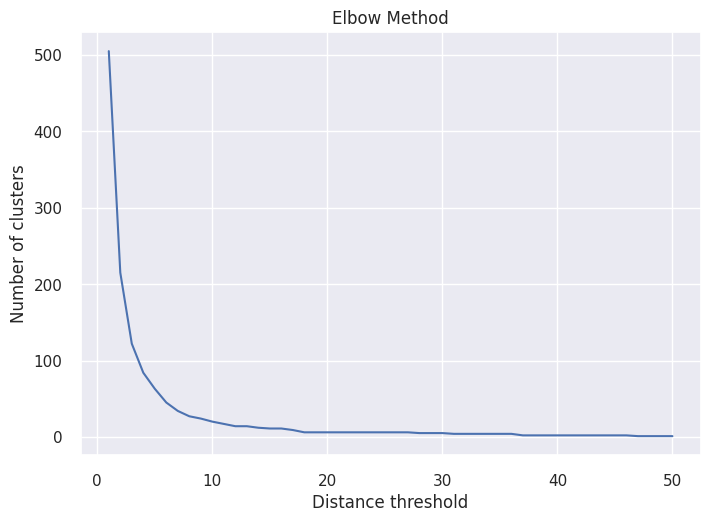

Optimal distance threshold: 7.0


In [147]:
from kneed import KneeLocator
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',  'speechiness',  'valence']

X=df[features]

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Calculate number of clusters for different distance thresholds
max_d_range = np.linspace(1, 50, 50)
n_clusters = [len(np.unique(fcluster(Z, d, criterion='distance'))) for d in max_d_range]

# Plot
plt.plot(max_d_range, n_clusters)
plt.xlabel('Distance threshold')
plt.ylabel('Number of clusters')
plt.title('Elbow Method')
plt.show()

# Find the elbow point
kneedle = KneeLocator(max_d_range, n_clusters, S=1.0, curve='convex', direction='decreasing')
optimal_d = kneedle.elbow
print(f"Optimal distance threshold: {optimal_d}")

The optimal value for the d  is 7 according to the elbow plot. We decided to not proceed with that value because it resulted in too many clusters (34). Therefore, we visually interpreted the dendrogram to decide where to cut it to obtain our desired number of clusters.

**Hierarchical clustering using all features**

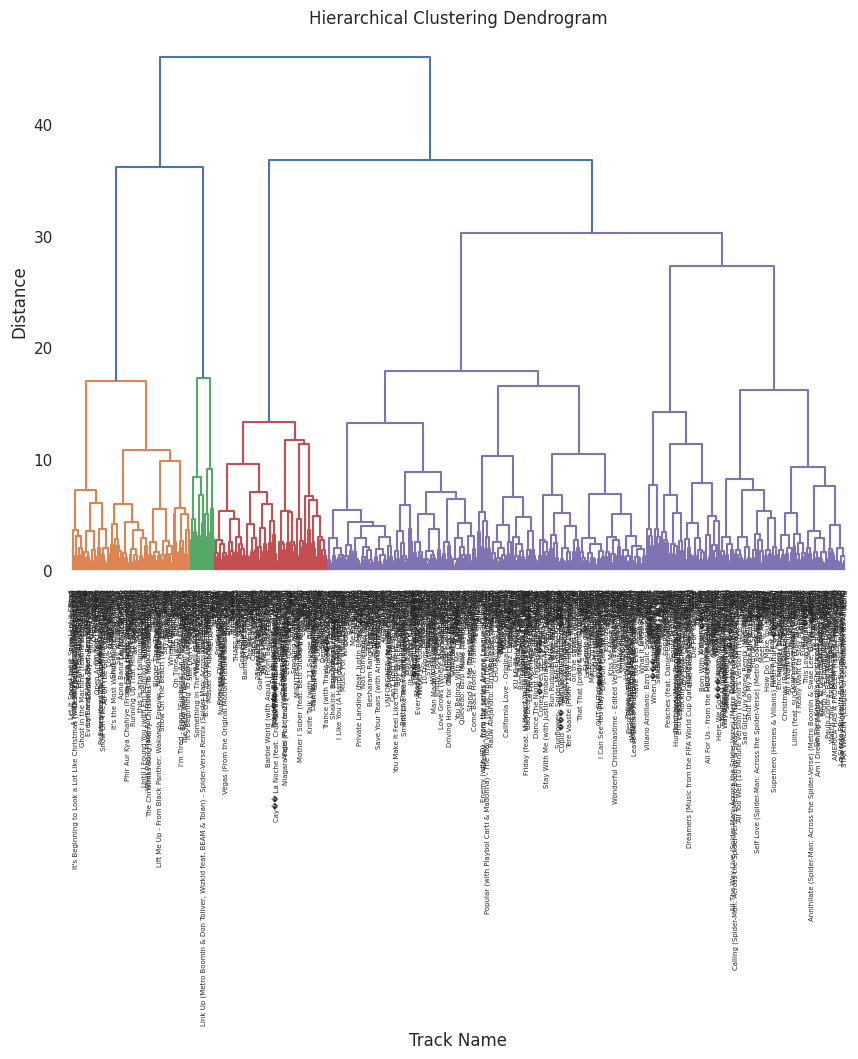

                                    name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

In [148]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Select the features for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',  'speechiness',  'valence']

X=df[features]

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df['name'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Track Name')
plt.ylabel('Distance')
plt.show()

# Get cluster labels
max_d = 35  # Maximum distance for cutting the tree to form clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the DataFrame
df['cluster'] = clusters

print(df)

In [149]:
df.cluster.unique()

array([4, 2, 3, 1], dtype=int32)

In [150]:
df[df.cluster==1]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,D,Minor,-1.092091,-0.827979,-1.286382,2.153081,-0.188132,-0.672285,-0.719761,1
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,NaN,Major,-1.570791,-1.594971,-3.341776,2.653419,-0.188132,-0.599314,-0.719761,1
43,See You Again,"Tyler, The Creator, Kali Uchis",3,2017,7,21,13387,64,1047101291,77,...,F#,Major,-0.750162,0.279898,-0.500496,0.382654,-0.188132,-0.526342,-0.013239,1
54,Another Love,Tom Odell,1,2012,10,15,18371,83,1813673666,250,...,E,Minor,-1.502405,-1.637582,-0.621401,1.652743,-0.188132,-0.672285,-0.618829,1
62,Left and Right (Feat. Jung Kook of BTS),"Charlie Puth, BTS, Jung Kook",3,2022,6,24,3107,39,720434240,38,...,D,Major,1.438182,0.876447,-0.319137,1.344843,-0.188132,-0.672285,-0.719761,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,The Scientist,Coldplay,1,2002,8,5,30992,6,1608164312,124,...,F,Major,-0.750162,-1.296696,-1.225929,1.768206,-0.188132,-0.526342,-0.820693,1
911,Sparks,Coldplay,1,2000,7,10,10826,4,624101957,24,...,C#,Major,-2.049491,-1.467139,-2.253626,1.845181,0.406725,-0.599314,-0.719761,1
940,Sweet Nothing,Taylor Swift,1,2022,10,21,1747,0,186104310,9,...,NaN,Major,-2.254648,-0.529705,-2.918606,2.691907,-0.188132,-0.453371,-0.517897,1
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,-0.476619,-1.168864,-1.528193,1.152405,-0.188132,-0.745256,-0.719761,1


In [151]:
df[df.cluster==2]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966,2
15,Kill Bill,SZA,1,2022,12,8,8109,77,1163093654,183,...,G#,Major,-0.203076,-0.359262,0.527201,-0.848947,1.834381,-0.161486,-0.618829,2
72,golden hour,JVKE,1,2022,7,15,4511,36,751134527,70,...,C#,Minor,-1.092091,-1.594971,-0.319137,1.460305,1.953352,0.495255,-0.719761,2
88,Makeba,Jain,1,2015,6,22,6060,53,165484133,150,...,D,Major,1.027867,-0.487094,0.104032,0.459629,5.879406,0.495255,-0.316034,2
184,Apocalypse,Cigarettes After Sex,1,2017,3,21,13091,17,841749534,61,...,F,Major,-2.049491,-1.467139,-1.044571,-0.964410,5.284549,-0.526342,-0.719761,2
238,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",5,2023,6,2,197,0,32761689,3,...,F,Major,1.711724,0.322509,-0.802759,0.536604,5.879406,0.568226,-0.215102,2
284,METAMORPHOSIS,INTERWORLD,1,2021,11,25,1561,24,357580552,18,...,G,Minor,-0.545005,-1.552360,-0.016873,0.613579,10.519288,-0.453371,-0.013239,2
307,I Know - PR1SVX Edit,"Kanii, PR1ISVX",2,2023,3,24,407,0,77377503,16,...,B,Minor,0.002081,-1.722803,0.708560,-0.733484,5.403520,0.860111,-0.316034,2
326,Heart To Heart,Mac DeMarco,1,2019,5,10,1640,0,244658767,27,...,G#,Minor,1.574953,0.535562,-3.039512,1.537280,3.975865,-0.526342,-0.013239,2
408,After Dark,Mr.Kitty,1,2014,8,8,1776,14,646886885,1,...,G#,Major,-0.613391,-2.021077,-0.258685,-0.771972,4.689692,-0.745256,-0.719761,2


In [152]:
df[df.cluster==3]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,1.711724,0.620783,-0.379590,-0.310122,-0.188132,-0.745256,1.399806,3
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,0.959481,0.194677,-0.984118,-0.233146,-0.188132,-0.745256,2.308192,3
18,Classy 101,"Feid, Young Miko",2,2023,3,31,2610,40,335222234,43,...,B,Major,1.301410,0.663394,0.104032,-0.502559,-0.188132,-0.453371,0.592352,3
34,TQG,"Karol G, Shakira",2,2023,2,23,4284,49,618990393,115,...,E,Minor,0.344010,0.407730,-0.077326,1.537280,-0.188132,-0.672285,1.803533,3
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,65156199,82,...,NaN,Major,0.685938,1.004279,-0.379590,0.959967,-0.188132,0.349313,1.500738,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,On BS,"Drake, 21 Savage",2,2022,11,4,1338,0,170413877,9,...,A,Major,1.164639,-0.785368,-1.709551,-0.964410,-0.188132,1.516852,4.932417,3
936,Mastermind,Taylor Swift,1,2022,10,21,1936,0,218320587,7,...,E,Major,-0.066305,-1.680192,-1.770004,1.075430,-0.188132,-0.672285,0.390488,3
943,Privileged Rappers,"Drake, 21 Savage",2,2022,11,4,1007,0,112436403,6,...,F,Major,1.780110,0.450341,-0.198232,-1.041385,-0.188132,-0.453371,0.996079,3
945,BackOutsideBoyz,Drake,1,2022,11,4,1045,0,93367537,8,...,F,Minor,1.233024,-0.487094,-1.286382,-0.887435,-0.188132,1.516852,2.207260,3


In [153]:
df[df.cluster==4]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966,4
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420,4
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,0.002081,1.345164,0.708560,0.806017,-0.188132,-0.745256,-0.719761,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,The Astronaut,Jin,1,2022,10,28,481,9,203436468,10,...,F,Major,-0.886934,-1.254086,0.708560,-1.041385,-0.188132,-0.307429,-0.719761,4
947,The Great War,Taylor Swift,1,2022,10,21,1274,0,181382590,1,...,F,Major,-0.681776,0.152066,0.587654,-0.194659,-0.188132,-0.745256,-0.618829,4
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,0.891096,1.259943,0.164485,-0.887435,-0.188132,-0.745256,-0.416966,4
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,1.027867,0.663394,0.769012,-0.733484,-0.188132,-0.453371,-0.517897,4


**Random forest to determine importance of each feature in clustering**:

            Feature  Importance
5       speechiness    0.333533
0      acousticness    0.238842
2            energy    0.155098
3  instrumentalness    0.085687
1      danceability    0.067689
4          liveness    0.063298
6           valence    0.055854


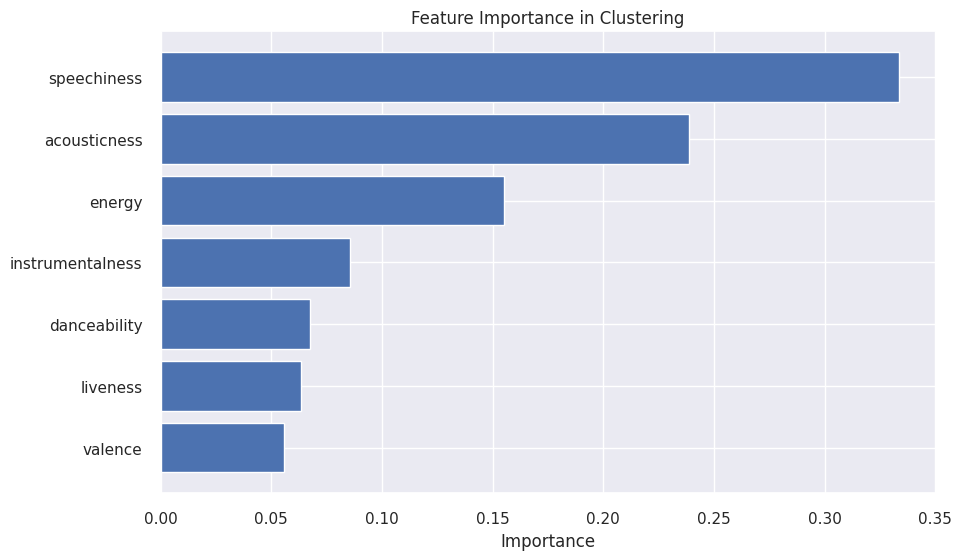

In [154]:
from sklearn.ensemble import RandomForestClassifier

# Use a random forest to determine feature importance
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, df['cluster'])

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Clustering')
plt.gca().invert_yaxis()
plt.show()

**Hierarchical clustering using speechiness and acousticness**

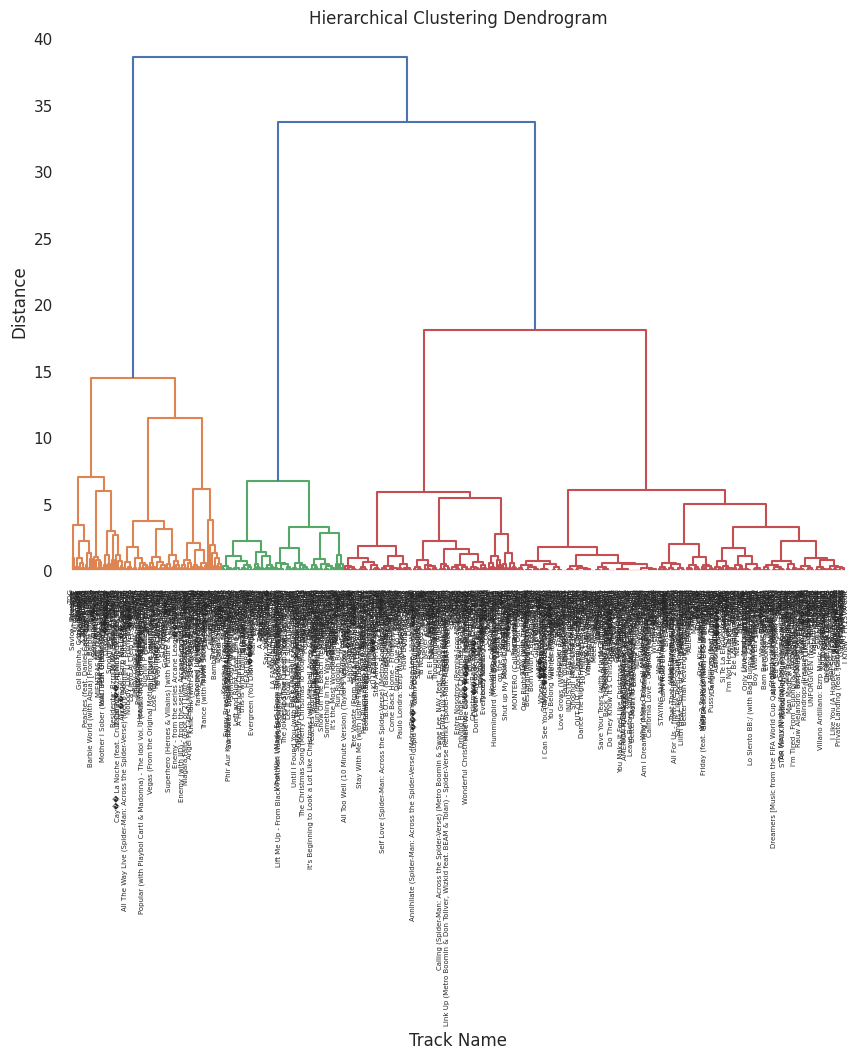

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829,3
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829,3
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966,3
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420,1
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,-0.476619,-1.168864,-1.528193,1.152405,-0.188132,-0.745256,-0.719761,2
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,-1.707562,-1.893245,-2.434984,2.153081,-0.069161,-0.453371,-0.416966,2
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,0.891096,1.259943,0.164485,-0.887435,-0.188132,-0.745256,-0.416966,3
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,1.027867,0.663394,0.769012,-0.733484,-0.188132,-0.453371,-0.517897,3


In [155]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# Select the features for clustering
features = ['speechiness','acousticness']

X=df[features]

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df['name'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Track Name')
plt.ylabel('Distance')
plt.show()

# Get cluster labels
max_d = 20  # Maximum distance for cutting the tree to form clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the DataFrame
df['cluster'] = clusters

df

In [156]:
df.cluster.unique()

array([3, 1, 2], dtype=int32)

In [157]:
df[df.cluster==1]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420,1
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,1.711724,0.620783,-0.379590,-0.310122,-0.188132,-0.745256,1.399806,1
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,0.959481,0.194677,-0.984118,-0.233146,-0.188132,-0.745256,2.308192,1
18,Classy 101,"Feid, Young Miko",2,2023,3,31,2610,40,335222234,43,...,B,Major,1.301410,0.663394,0.104032,-0.502559,-0.188132,-0.453371,0.592352,1
24,Popular (with Playboi Carti & Madonna) - The I...,"The Weeknd, Madonna, Playboi Carti",3,2023,6,2,1945,87,115364561,74,...,C#,Major,1.233024,1.345164,0.224938,-0.771972,-0.188132,1.297939,0.996079,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,Question...?,Taylor Swift,1,2022,10,21,1608,0,223064273,10,...,G,Major,0.549167,-1.722803,-0.863212,-0.271634,-0.188132,0.860111,0.693284,1
935,On BS,"Drake, 21 Savage",2,2022,11,4,1338,0,170413877,9,...,A,Major,1.164639,-0.785368,-1.709551,-0.964410,-0.188132,1.516852,4.932417,1
943,Privileged Rappers,"Drake, 21 Savage",2,2022,11,4,1007,0,112436403,6,...,F,Major,1.780110,0.450341,-0.198232,-1.041385,-0.188132,-0.453371,0.996079,1
945,BackOutsideBoyz,Drake,1,2022,11,4,1045,0,93367537,8,...,F,Minor,1.233024,-0.487094,-1.286382,-0.887435,-0.188132,1.516852,2.207260,1


In [158]:
df[df.cluster==2]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,D,Minor,-1.092091,-0.827979,-1.286382,2.153081,-0.188132,-0.672285,-0.719761,2
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,NaN,Major,-1.570791,-1.594971,-3.341776,2.653419,-0.188132,-0.599314,-0.719761,2
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,0.617553,1.686049,-0.863212,1.036942,-0.188132,-0.818227,-0.517897,2
54,Another Love,Tom Odell,1,2012,10,15,18371,83,1813673666,250,...,E,Minor,-1.502405,-1.637582,-0.621401,1.652743,-0.188132,-0.672285,-0.618829,2
57,La Bachata,Manuel Turizo,1,2022,5,26,6804,45,1214083358,139,...,G,Minor,1.164639,1.430386,0.224938,1.190893,-0.188132,0.276341,-0.618829,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,Sparks,Coldplay,1,2000,7,10,10826,4,624101957,24,...,C#,Major,-2.049491,-1.467139,-2.253626,1.845181,0.406725,-0.599314,-0.719761,2
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,187339835,6,...,NaN,Major,-1.297248,-1.552360,-2.011815,2.037618,2.429237,-0.453371,-0.618829,2
940,Sweet Nothing,Taylor Swift,1,2022,10,21,1747,0,186104310,9,...,NaN,Major,-2.254648,-0.529705,-2.918606,2.691907,-0.188132,-0.453371,-0.517897,2
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,-0.476619,-1.168864,-1.528193,1.152405,-0.188132,-0.745256,-0.719761,2


In [159]:
df[df.cluster==3]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829,3
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829,3
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966,3
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966,3
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,0.002081,1.345164,0.708560,0.806017,-0.188132,-0.745256,-0.719761,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,The Astronaut,Jin,1,2022,10,28,481,9,203436468,10,...,F,Major,-0.886934,-1.254086,0.708560,-1.041385,-0.188132,-0.307429,-0.719761,3
947,The Great War,Taylor Swift,1,2022,10,21,1274,0,181382590,1,...,F,Major,-0.681776,0.152066,0.587654,-0.194659,-0.188132,-0.745256,-0.618829,3
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,0.891096,1.259943,0.164485,-0.887435,-0.188132,-0.745256,-0.416966,3
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,1.027867,0.663394,0.769012,-0.733484,-0.188132,-0.453371,-0.517897,3


In [160]:
from tabulate import tabulate
# Calculate and print the characteristics of each feature for each cluster
cluster_stats = []

for cluster_label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_label][features]
    stats = cluster_data.describe().reset_index()
    stats['cluster'] = cluster_label
    cluster_stats.append(stats)

# Concatenate all cluster statistics into a single DataFrame
all_cluster_stats = pd.concat(cluster_stats)

# Reorder columns to place 'cluster' first
all_cluster_stats = all_cluster_stats[['cluster'] + [col for col in all_cluster_stats.columns if col != 'cluster']]

# Print the statistics in a table format with separation lines between clusters
tables = []
for cluster_label in all_cluster_stats['cluster'].unique():
    cluster_table = all_cluster_stats[all_cluster_stats['cluster'] == cluster_label]
    tables.append(tabulate(cluster_table, headers='keys', tablefmt='psql'))

print('\n\n'.join(tables))

+----+-----------+---------+---------------+----------------+
|    |   cluster | index   |   speechiness |   acousticness |
|----+-----------+---------+---------------+----------------|
|  0 |         3 | count   |    618        |    618         |
|  1 |         3 | mean    |     -0.415332 |     -0.405219  |
|  2 |         3 | std     |      0.29503  |      0.581925  |
|  3 |         3 | min     |     -0.820693 |     -1.04138   |
|  4 |         3 | 25%     |     -0.618829 |     -0.887435  |
|  5 |         3 | 50%     |     -0.517897 |     -0.618022  |
|  6 |         3 | 75%     |     -0.215102 |      0.0362663 |
|  7 |         3 | max     |      0.592352 |      1.07543   |
+----+-----------+---------+---------------+----------------+

+----+-----------+---------+---------------+----------------+
|    |   cluster | index   |   speechiness |   acousticness |
|----+-----------+---------+---------------+----------------|
|  0 |         1 | count   |    186        |     186        |
|  1 | 

**Hierarchical clustering using danceability**



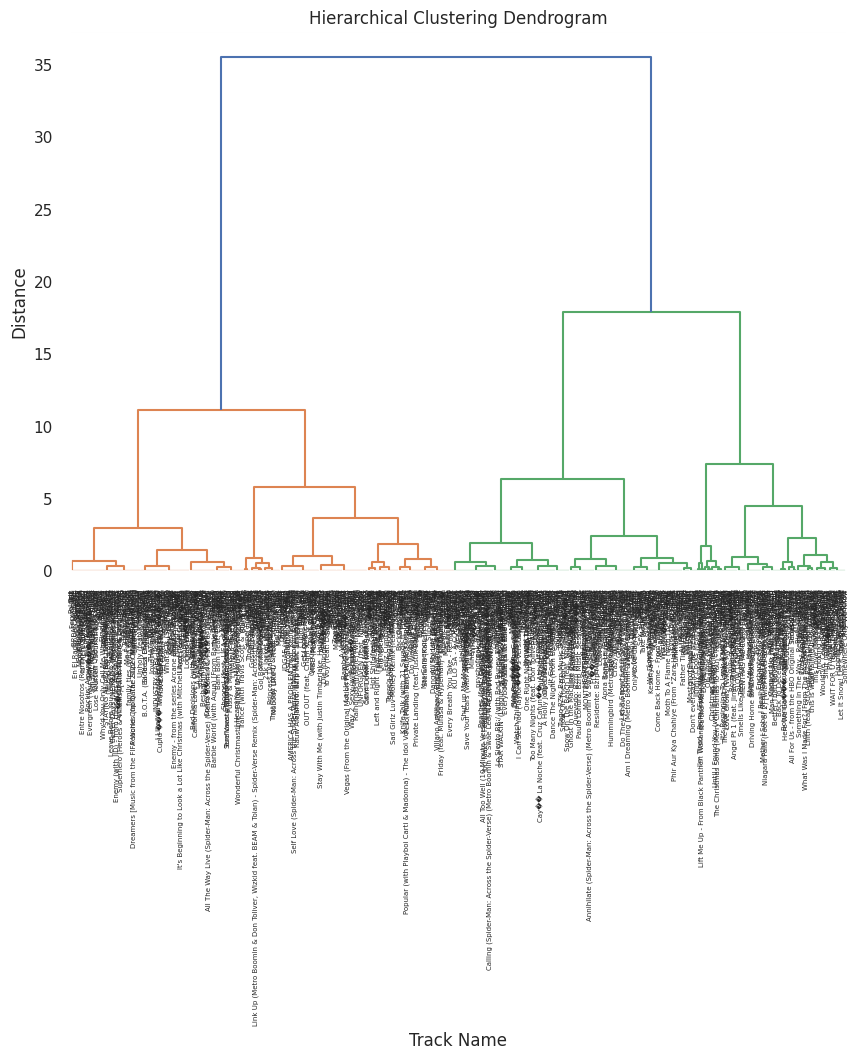

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829,1
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966,2
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420,2
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,-0.476619,-1.168864,-1.528193,1.152405,-0.188132,-0.745256,-0.719761,2
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,-1.707562,-1.893245,-2.434984,2.153081,-0.069161,-0.453371,-0.416966,2
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,0.891096,1.259943,0.164485,-0.887435,-0.188132,-0.745256,-0.416966,1
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,1.027867,0.663394,0.769012,-0.733484,-0.188132,-0.453371,-0.517897,1


In [161]:
# Select the features for clustering
features = [ 'danceability']

X=df[features]

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df['name'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Track Name')
plt.ylabel('Distance')
plt.show()

# Get cluster labels
max_d = 20  # Maximum distance for cutting the tree to form clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the DataFrame
df['cluster'] = clusters

df

**Hierarchical clustering using valence**


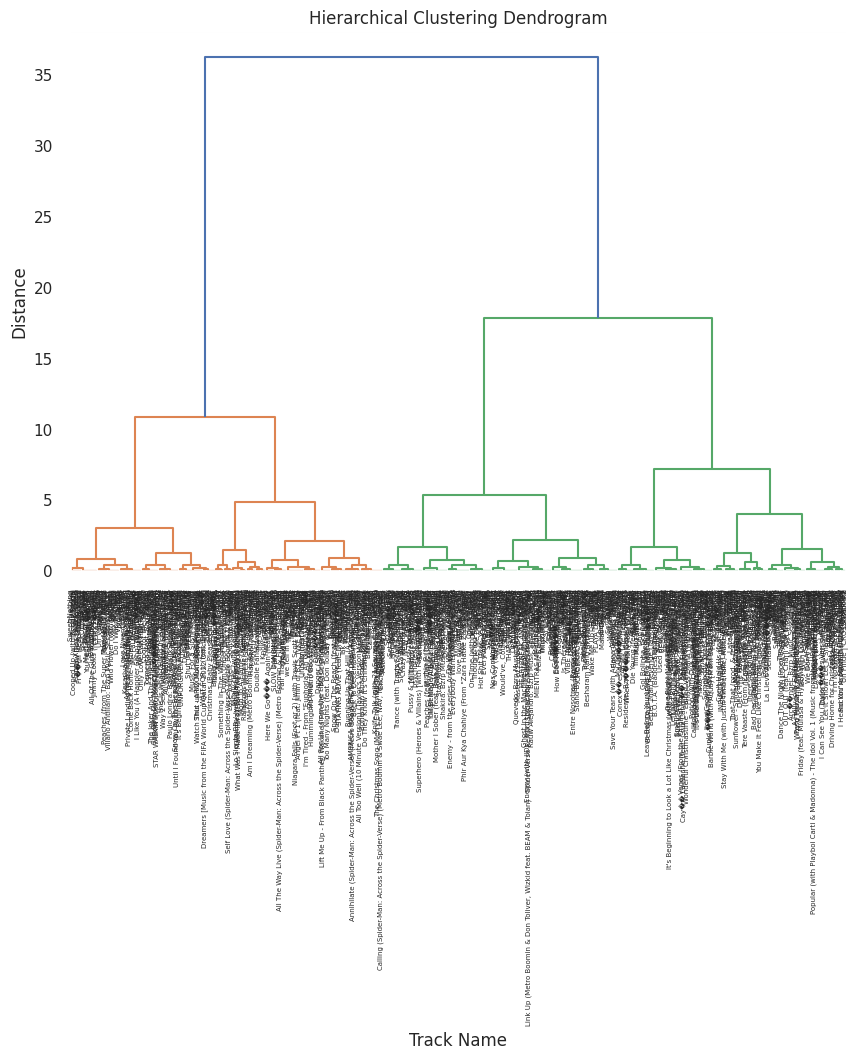

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829,2
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829,2
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966,1
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420,2
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,-0.476619,-1.168864,-1.528193,1.152405,-0.188132,-0.745256,-0.719761,1
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,-1.707562,-1.893245,-2.434984,2.153081,-0.069161,-0.453371,-0.416966,1
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,0.891096,1.259943,0.164485,-0.887435,-0.188132,-0.745256,-0.416966,2
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,1.027867,0.663394,0.769012,-0.733484,-0.188132,-0.453371,-0.517897,2


In [162]:
# Select the features for clustering
features = [ 'valence']

X=df[features]

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df['name'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Track Name')
plt.ylabel('Distance')
plt.show()

# Get cluster labels
max_d = 20  # Maximum distance for cutting the tree to form clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the DataFrame
df['cluster'] = clusters

df

#### **DBSCAN Clustering**


**Tuning eps using KNN distance plot**

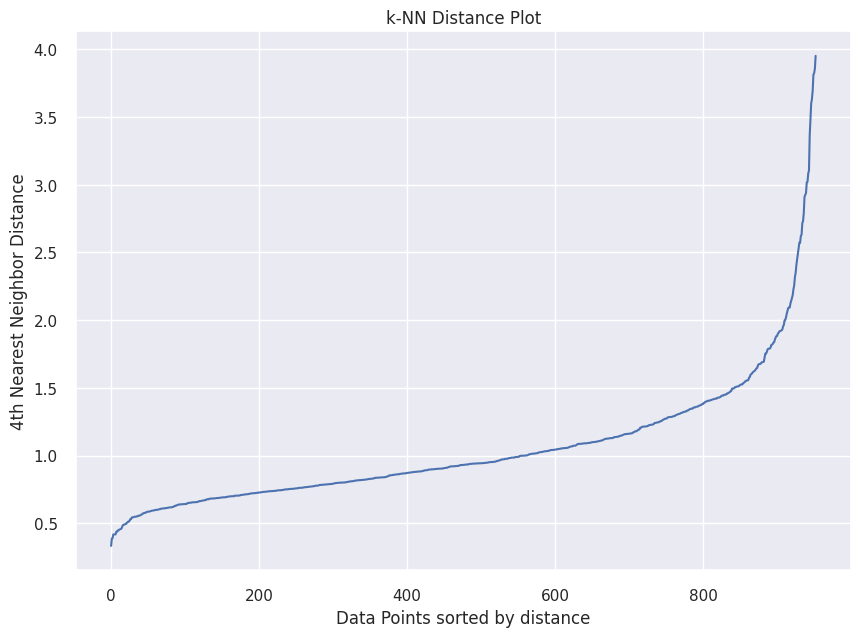

In [163]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# Assuming df is already defined and features are already scaled
# Select the features for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

# Use the scaled features
X = df[features].values

# Find the optimal value for eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort and plot the distances
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 7))
plt.plot(distances)
plt.title('k-NN Distance Plot')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

We determined that the optimal value for eps is between 1.5 and 2 because that is where the knee is located ie. that is when the slope of the curve changes.We settled for 1.5 and vizualed the clusters below.

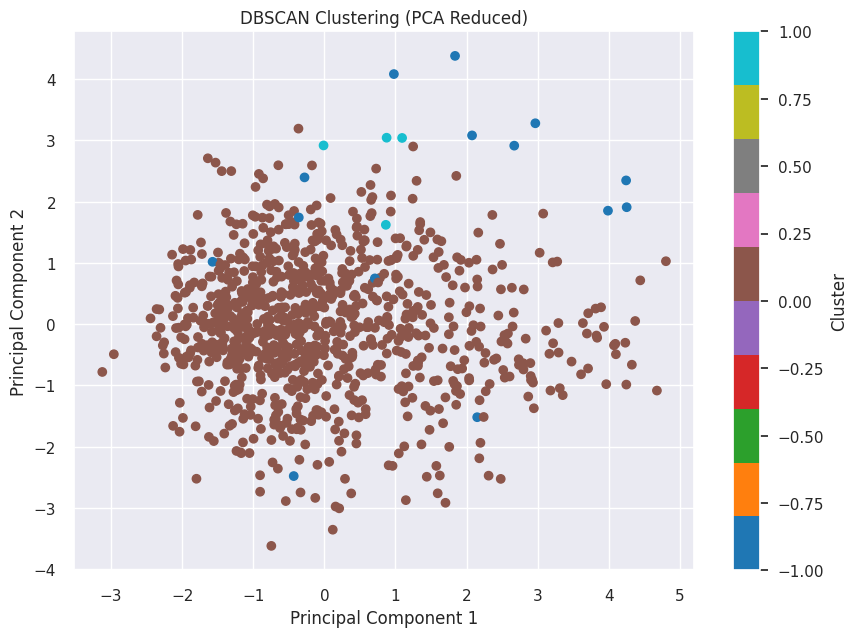

                                    name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

In [164]:
# Perform DBSCAN clustering with tuned parameters
# Adjust eps based on the knee point in the k-NN distance plot
dbscan = DBSCAN(eps=2.5, min_samples=5)  # Example values, adjust as needed
clusters = dbscan.fit_predict(X)

# Add cluster labels to the DataFrame
df['cluster'] = clusters

# Reduce dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the results
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', marker='o')
plt.title('DBSCAN Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Print the DataFrame with cluster labels
print(df)

**Tuning min_samples using silhouette score as a metric**



For min_samples = 3, Silhouette Score: 0.5089610800905244


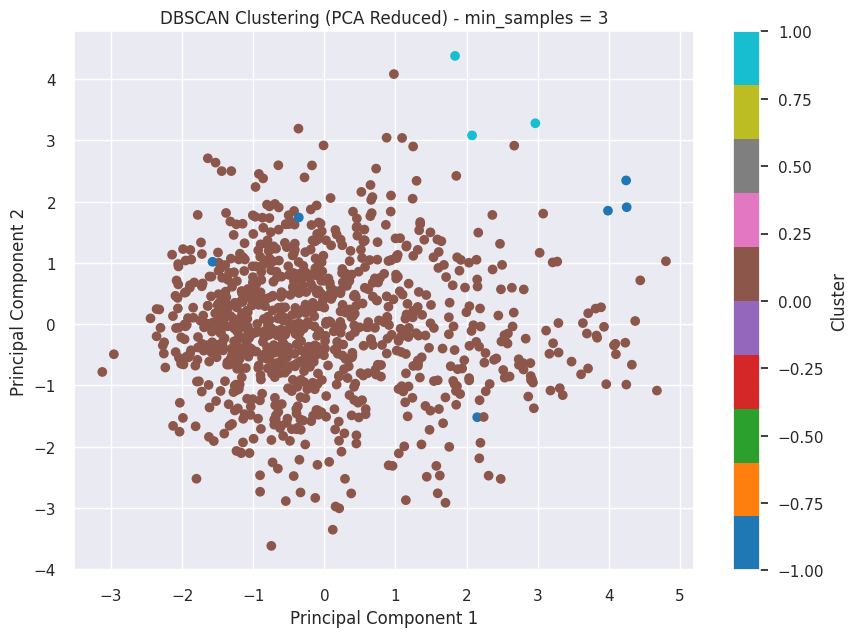

                                    name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

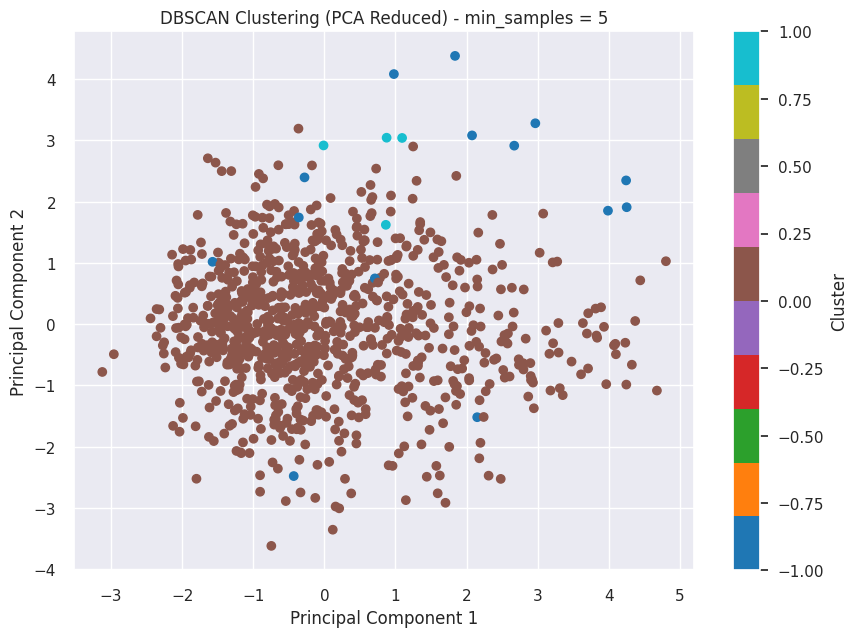

                                    name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

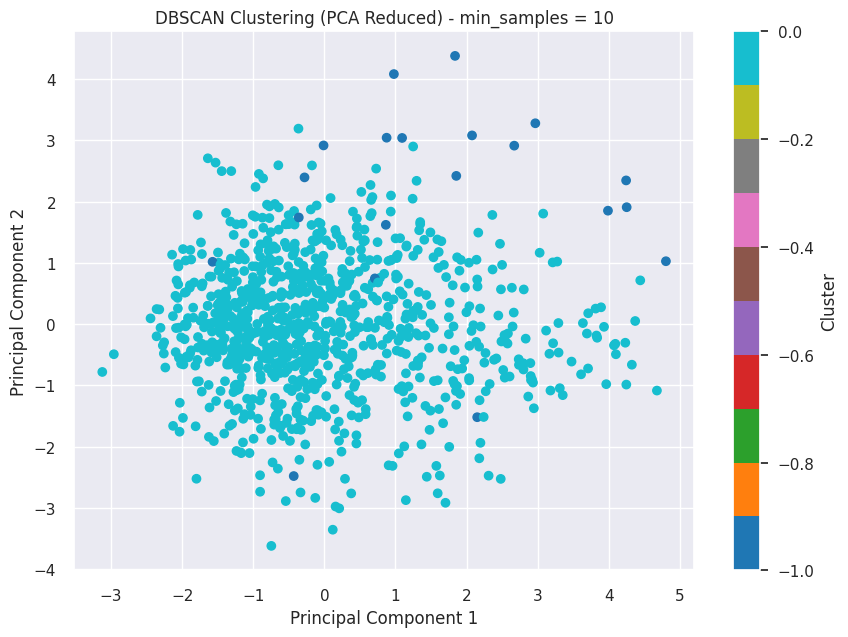

                                    name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

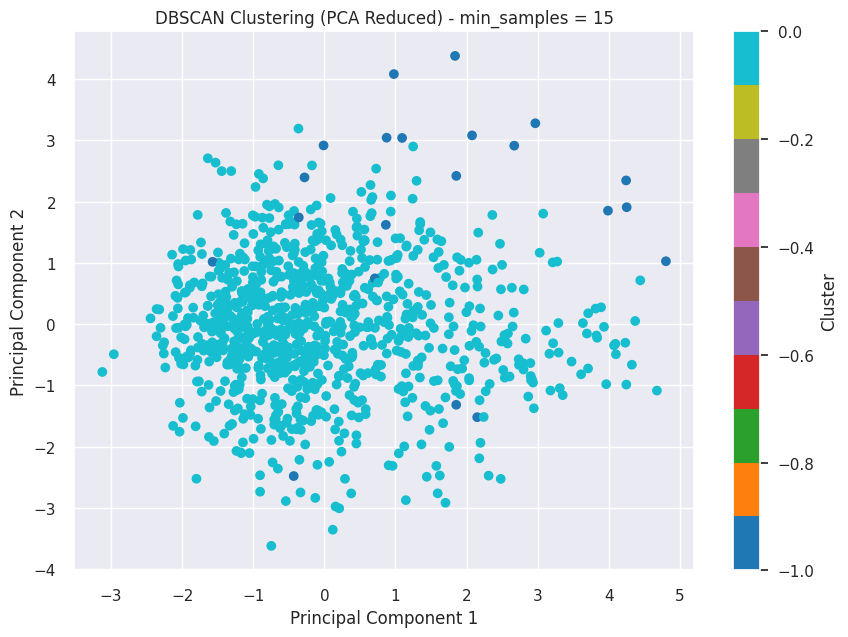

                                    name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

In [165]:
from sklearn.metrics import silhouette_score

# Set eps based on the knee in the plot
eps = 2.5  # Example value, adjust based on the plot

# Tune min_samples
min_samples_list = [3, 5, 10, 15]  # Example values to try

for min_samples in min_samples_list:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)

    # Evaluate clustering performance (e.g., silhouette score)
    if len(set(clusters)) > 1:  # Check if there's more than one cluster
        silhouette_avg = silhouette_score(X, clusters)
        print(f"For min_samples = {min_samples}, Silhouette Score: {silhouette_avg}")
    else:
        print(f"For min_samples = {min_samples}, Only noise points detected.")

    # Add cluster labels to the DataFrame for visualization
    df['cluster'] = clusters

    # Visualize clustering results (e.g., PCA reduced plot)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10, 7))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', marker='o')
    plt.title(f'DBSCAN Clustering (PCA Reduced) - min_samples = {min_samples}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

    # Print the DataFrame with cluster labels
    print(df)

We chose to proceed with min_samples=10 because it yielded the highest silhouette score.

**Feature Importance in clustering using eps=1.5 and min_samples=10**

            Feature  Importance
3  instrumentalness    0.757956
0      acousticness    0.106264
2            energy    0.043633
4          liveness   -0.002158
1      danceability   -0.012938
6           valence   -0.020596
5       speechiness   -0.033478


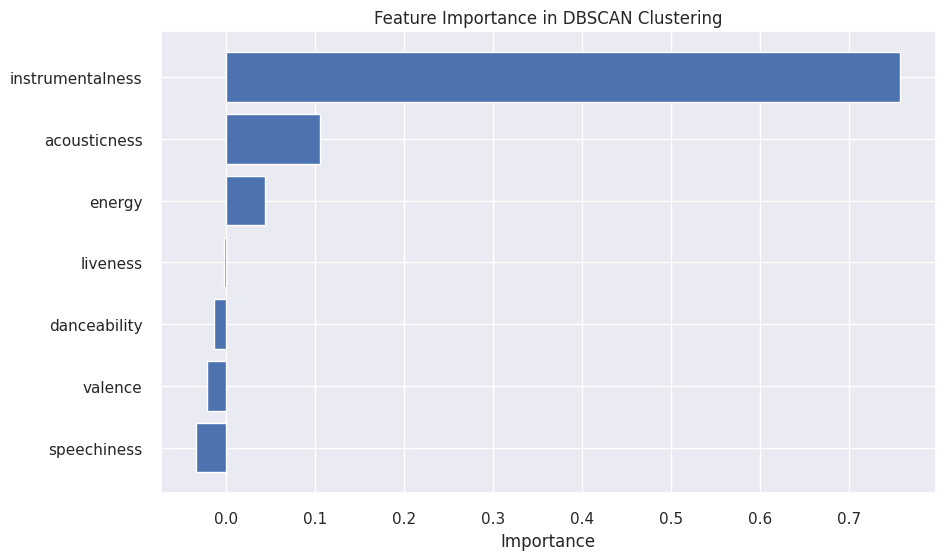

In [166]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming df is already defined and features are already scaled
# Select the features for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

# Use the scaled features
X = df[features].values

# Perform DBSCAN clustering
# You may need to tune the eps and min_samples parameters
dbscan = DBSCAN(eps=2.5, min_samples=3)
clusters = dbscan.fit_predict(X)

# Calculate the original silhouette score
if len(set(clusters)) > 1:  # Ensure there is more than one cluster
    original_score = silhouette_score(X, clusters)
else:
    original_score = -1

# Function to calculate silhouette score after permuting a feature
def calculate_permutation_importance(X, clusters, feature_idx, random_state=None):
    X_permuted = X.copy()
    if random_state:
        np.random.seed(random_state)
    np.random.shuffle(X_permuted[:, feature_idx])
    permuted_clusters = dbscan.fit_predict(X_permuted)
    if len(set(permuted_clusters)) > 1:  # Ensure there is more than one cluster
        score = silhouette_score(X, permuted_clusters)
    else:
        score = -1  # Assign the lowest possible score if only one cluster is formed
    return score

# Calculate importances
importances = []
for i in range(X.shape[1]):
    permuted_score = calculate_permutation_importance(X, clusters, i)
    importance = original_score - permuted_score
    importances.append(importance)

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in DBSCAN Clustering')
plt.gca().invert_yaxis()
plt.show()

In [167]:
df.cluster.unique()

array([ 0, -1])

It seems that I need to work on this before there are two clusters before tuning min_samples very strange double check later.

#### **Kmeans Clustering**


**Finding optimal k**

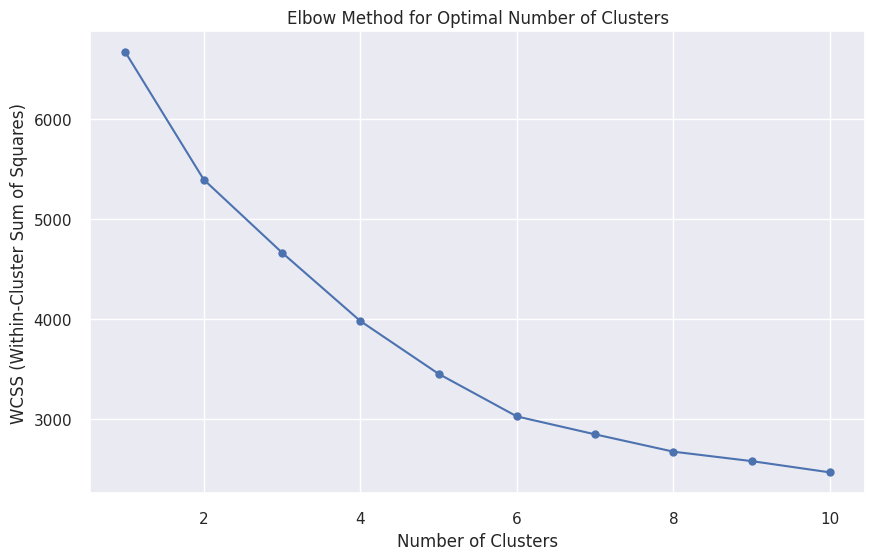

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df is already defined and features are already scaled
# Select the features for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
X = df[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to calculate WCSS (Within-Cluster Sum of Squares) for K-means
def calculate_wcss(X):
    wcss = []
    for i in range(1, 11):  # Try from 1 to 10 clusters
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculate WCSS for different numbers of clusters
wcss = calculate_wcss(X_scaled)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


Based on the graph, the optimal k is k=4.We will therefore proceed with that.

**Kmeans using all features**

Cluster Centers:
[[ 0.15172895 -0.45248304 -0.34047359  6.64222194 -0.29884386 -0.47633729
  -0.81795307]
 [-0.42990703  0.27066846  0.49500373 -0.13856061  0.07738887 -0.33303874
   0.35539286]
 [-0.04413572  0.41239543 -0.10962294 -0.1791684  -0.08451654  2.037888
  -0.05865251]
 [ 1.01333237 -0.84843072 -1.05650866 -0.04316693 -0.10629787 -0.44368291
  -0.72986718]]

Number of samples in each cluster:
cluster
1    552
3    238
2    146
0     17
Name: count, dtype: int64


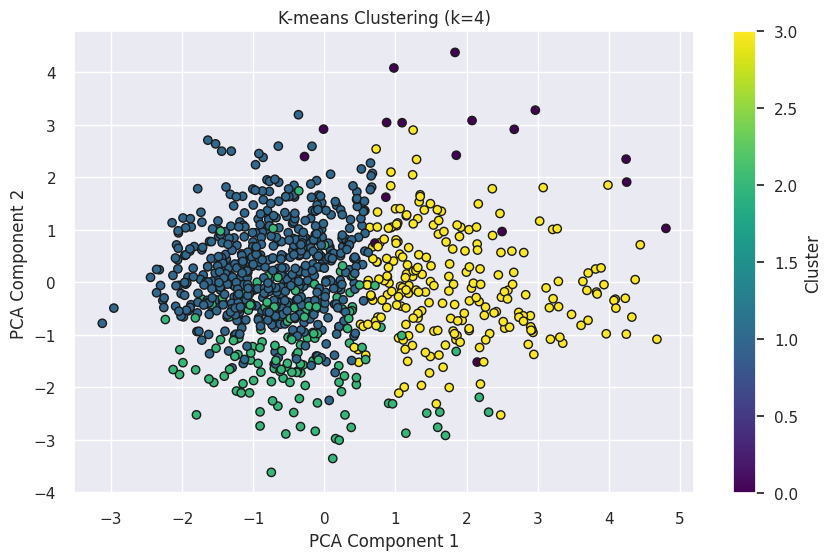

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df is already defined and features are already scaled
# Select the features for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
X = df[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run K-means clustering with k=4
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Print number of samples in each cluster
print("\nNumber of samples in each cluster:")
print(df['cluster'].value_counts())

# Plot clusters if needed (for visualization, we'll use 2D PCA reduction for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title('K-means Clustering (k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [170]:
df[df.cluster==0]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966,0
88,Makeba,Jain,1,2015,6,22,6060,53,165484133,150,...,D,Major,1.027867,-0.487094,0.104032,0.459629,5.879406,0.495255,-0.316034,0
184,Apocalypse,Cigarettes After Sex,1,2017,3,21,13091,17,841749534,61,...,F,Major,-2.049491,-1.467139,-1.044571,-0.964410,5.284549,-0.526342,-0.719761,0
238,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",5,2023,6,2,197,0,32761689,3,...,F,Major,1.711724,0.322509,-0.802759,0.536604,5.879406,0.568226,-0.215102,0
284,METAMORPHOSIS,INTERWORLD,1,2021,11,25,1561,24,357580552,18,...,G,Minor,-0.545005,-1.552360,-0.016873,0.613579,10.519288,-0.453371,-0.013239,0
307,I Know - PR1SVX Edit,"Kanii, PR1ISVX",2,2023,3,24,407,0,77377503,16,...,B,Minor,0.002081,-1.722803,0.708560,-0.733484,5.403520,0.860111,-0.316034,0
326,Heart To Heart,Mac DeMarco,1,2019,5,10,1640,0,244658767,27,...,G#,Minor,1.574953,0.535562,-3.039512,1.537280,3.975865,-0.526342,-0.013239,0
408,After Dark,Mr.Kitty,1,2014,8,8,1776,14,646886885,1,...,G#,Major,-0.613391,-2.021077,-0.258685,-0.771972,4.689692,-0.745256,-0.719761,0
579,Freaks,Surf Curse,1,2015,5,10,3006,3,824420218,23,...,A,Major,-2.186263,-0.444483,1.796709,-1.041385,7.307062,-0.964170,-0.517897,0
684,Alien Blues,Vundabar,1,2015,7,24,1930,0,370068639,3,...,D#,Major,-1.365634,-0.316651,0.708560,-0.733484,10.638259,-0.672285,-0.719761,0


In [171]:
df[df.cluster==1]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829,1
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829,1
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420,1
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,0.002081,1.345164,0.708560,0.806017,-0.188132,-0.745256,-0.719761,1
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,Major,0.002081,-1.083643,0.406296,0.382654,-0.188132,-0.526342,-0.618829,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,The Astronaut,Jin,1,2022,10,28,481,9,203436468,10,...,F,Major,-0.886934,-1.254086,0.708560,-1.041385,-0.188132,-0.307429,-0.719761,1
947,The Great War,Taylor Swift,1,2022,10,21,1274,0,181382590,1,...,F,Major,-0.681776,0.152066,0.587654,-0.194659,-0.188132,-0.745256,-0.618829,1
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,0.891096,1.259943,0.164485,-0.887435,-0.188132,-0.745256,-0.416966,1
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,1.027867,0.663394,0.769012,-0.733484,-0.188132,-0.453371,-0.517897,1


In [172]:
df[df.cluster==2]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,1.711724,0.620783,-0.379590,-0.310122,-0.188132,-0.745256,1.399806,2
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,0.959481,0.194677,-0.984118,-0.233146,-0.188132,-0.745256,2.308192,2
34,TQG,"Karol G, Shakira",2,2023,2,23,4284,49,618990393,115,...,E,Minor,0.344010,0.407730,-0.077326,1.537280,-0.188132,-0.672285,1.803533,2
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,65156199,82,...,NaN,Major,0.685938,1.004279,-0.379590,0.959967,-0.188132,0.349313,1.500738,2
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,G,Major,0.070467,-0.103598,-0.319137,-0.425584,-0.188132,-0.380400,1.803533,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,Question...?,Taylor Swift,1,2022,10,21,1608,0,223064273,10,...,G,Major,0.549167,-1.722803,-0.863212,-0.271634,-0.188132,0.860111,0.693284,2
935,On BS,"Drake, 21 Savage",2,2022,11,4,1338,0,170413877,9,...,A,Major,1.164639,-0.785368,-1.709551,-0.964410,-0.188132,1.516852,4.932417,2
943,Privileged Rappers,"Drake, 21 Savage",2,2022,11,4,1007,0,112436403,6,...,F,Major,1.780110,0.450341,-0.198232,-1.041385,-0.188132,-0.453371,0.996079,2
945,BackOutsideBoyz,Drake,1,2022,11,4,1045,0,93367537,8,...,F,Minor,1.233024,-0.487094,-1.286382,-0.887435,-0.188132,1.516852,2.207260,2


In [173]:
df[df.cluster==3]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966,3
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,D,Minor,-1.092091,-0.827979,-1.286382,2.153081,-0.188132,-0.672285,-0.719761,3
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,NaN,Major,-1.570791,-1.594971,-3.341776,2.653419,-0.188132,-0.599314,-0.719761,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,NaN,Minor,-1.297248,-0.316651,-1.346834,-0.579534,0.049811,-0.526342,-0.719761,3
28,Last Night,Morgan Wallen,1,2023,1,31,2420,19,429829812,52,...,F#,Major,-1.023705,0.024234,0.224938,0.729042,-0.188132,-0.234457,-0.618829,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,Mastermind,Taylor Swift,1,2022,10,21,1936,0,218320587,7,...,E,Major,-0.066305,-1.680192,-1.770004,1.075430,-0.188132,-0.672285,0.390488,3
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,187339835,6,...,NaN,Major,-1.297248,-1.552360,-2.011815,2.037618,2.429237,-0.453371,-0.618829,3
940,Sweet Nothing,Taylor Swift,1,2022,10,21,1747,0,186104310,9,...,NaN,Major,-2.254648,-0.529705,-2.918606,2.691907,-0.188132,-0.453371,-0.517897,3
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,-0.476619,-1.168864,-1.528193,1.152405,-0.188132,-0.745256,-0.719761,3


**KMeans Feature Importance**:

            Feature  Importance
4          liveness    0.535502
6           valence    0.438506
1      danceability    0.404947
0      acousticness    0.368415
2            energy    0.355945
5       speechiness    0.276536
3  instrumentalness    0.096397


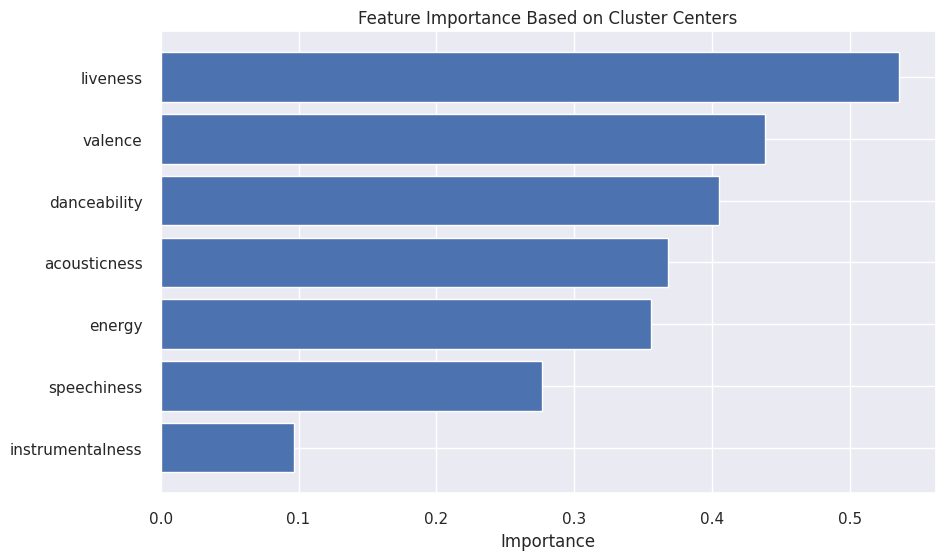

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df is already defined and features are already scaled
# Select the features for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
X = df[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run K-means clustering with k=4
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Calculate feature importance based on the distance of feature values from cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate mean distance of each feature to the cluster centers
feature_importances = np.zeros(X_scaled.shape[1])

for i, feature in enumerate(features):
    # Calculate distances of feature values from cluster centers
    feature_distances = np.abs(X_scaled[:, i][:, np.newaxis] - cluster_centers[:, i])
    mean_distance = np.mean(np.min(feature_distances, axis=1))
    feature_importances[i] = mean_distance

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance Based on Cluster Centers')
plt.gca().invert_yaxis()
plt.show()


**Kmeans using liveness, valence, and danceability**

Cluster Centers:
[[ 0.49822938 -0.33085158 -0.66963581]
 [-0.15781372  1.87540904  0.1768966 ]
 [ 0.62240719 -0.33513076  0.99757177]
 [-1.2177877  -0.29029376 -0.74931328]]

Number of samples in each cluster:
cluster
2    324
3    247
0    243
1    139
Name: count, dtype: int64


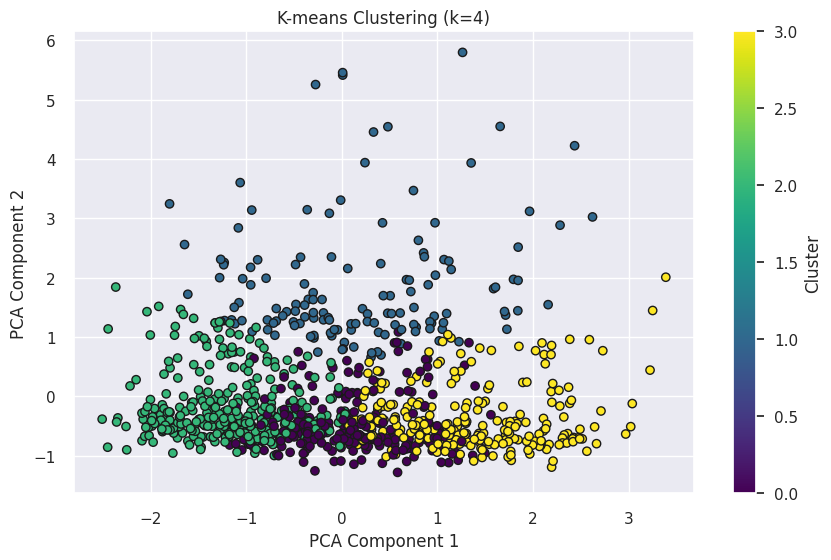

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df is already defined and features are already scaled
# Select the features for clustering
features = ['danceability', 'liveness', 'valence']
X = df[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run K-means clustering with k=4
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Print number of samples in each cluster
print("\nNumber of samples in each cluster:")
print(df['cluster'].value_counts())

# Plot clusters if needed (for visualization, we'll use 2D PCA reduction for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title('K-means Clustering (k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

**Clusters' metrics**

In [176]:
from tabulate import tabulate
# Calculate and print the characteristics of each feature for each cluster
cluster_stats = []

for cluster_label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_label][features]
    stats = cluster_data.describe().reset_index()
    stats['cluster'] = cluster_label
    cluster_stats.append(stats)

# Concatenate all cluster statistics into a single DataFrame
all_cluster_stats = pd.concat(cluster_stats)

# Reorder columns to place 'cluster' first
all_cluster_stats = all_cluster_stats[['cluster'] + [col for col in all_cluster_stats.columns if col != 'cluster']]

# Print the statistics in a table format with separation lines between clusters
tables = []
for cluster_label in all_cluster_stats['cluster'].unique():
    cluster_table = all_cluster_stats[all_cluster_stats['cluster'] == cluster_label]
    tables.append(tabulate(cluster_table, headers='keys', tablefmt='psql'))

print('\n\n'.join(tables))

+----+-----------+---------+----------------+------------+------------+
|    |   cluster | index   |   danceability |   liveness |    valence |
|----+-----------+---------+----------------+------------+------------|
|  0 |         2 | count   |     324        | 324        | 324        |
|  1 |         2 | mean    |       0.622407 |  -0.335131 |   0.997572 |
|  2 |         2 | std     |       0.655087 |   0.54788  |   0.50105  |
|  3 |         2 | min     |      -1.36563  |  -1.11011  |   0.152066 |
|  4 |         2 | 25%     |       0.207238 |  -0.672285 |   0.56752  |
|  5 |         2 | 50%     |       0.685938 |  -0.526342 |   1.00428  |
|  6 |         2 | 75%     |       1.02787  |  -0.143243 |   1.34516  |
|  7 |         2 | max     |       1.98527  |   1.58982  |   1.94171  |
+----+-----------+---------+----------------+------------+------------+

+----+-----------+---------+----------------+------------+------------+
|    |   cluster | index   |   danceability |   liveness |    v

In [177]:
df[df.cluster==0]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966,0
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,Major,0.002081,-1.083643,0.406296,0.382654,-0.188132,-0.526342,-0.618829,0
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,C#,Minor,1.233024,-1.254086,-0.137779,-0.579534,-0.188132,0.714169,-0.114170,0
11,Super Shy,NewJeans,1,2023,7,7,422,55,58255150,37,...,F,Minor,0.754324,0.024234,1.071276,-0.348609,-0.188132,-0.234457,-0.316034,0
15,Kill Bill,SZA,1,2022,12,8,8109,77,1163093654,183,...,G#,Major,-0.203076,-0.359262,0.527201,-0.848947,1.834381,-0.161486,-0.618829,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,Mastermind,Taylor Swift,1,2022,10,21,1936,0,218320587,7,...,E,Major,-0.066305,-1.680192,-1.770004,1.075430,-0.188132,-0.672285,0.390488,0
937,Circo Loco,"Drake, 21 Savage",2,2022,11,4,1794,0,141720999,26,...,C#,Major,0.412395,-1.126254,-0.198232,-1.002897,-0.188132,1.006054,-0.316034,0
939,Spin Bout U,"Drake, 21 Savage",2,2022,11,4,1652,2,198365537,26,...,G,Major,0.685938,-1.339307,0.345843,-1.002897,-0.188132,-0.161486,-0.517897,0
942,Con La Brisa,"Ludwig Goransson, Foudeqush",2,2022,11,4,486,0,71095708,8,...,D,Minor,-0.339848,-1.126254,-1.225929,0.921480,3.737922,-0.307429,-0.719761,0


In [178]:
df[df.cluster==1]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
10,un x100to,"Bad Bunny, Grupo Frontera",2,2023,4,17,2876,40,505671438,41,...,F#,Minor,-0.681776,0.194677,0.466749,-0.156171,-0.188132,0.641198,-0.517897,1
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,...,F#,Minor,-1.023705,0.620783,0.527201,0.267192,-0.188132,0.933082,-0.416966,1
16,Cupid - Twin Ver.,Fifty Fifty,1,2023,2,24,2942,77,496795686,91,...,B,Minor,0.754324,1.046890,-0.319137,0.613579,-0.188132,1.151996,-0.719761,1
19,Like Crazy,Jimin,1,2023,3,24,596,68,363369738,8,...,G,Major,-0.271462,-0.657536,0.527201,-1.041385,-0.188132,1.297939,-0.618829,1
20,LADY GAGA,"Gabito Ballesteros, Junior H, Peso Pluma",3,2023,6,22,332,26,86444842,11,...,F,Minor,-0.134690,1.515607,0.587654,-0.194659,-0.188132,1.735766,-0.618829,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,Nxde,(G)I-DLE,1,2022,10,17,430,6,170709584,14,...,E,Minor,0.412395,0.578172,1.615351,-0.887435,-0.188132,2.173594,0.794215,1
926,Typa Girl,BLACKPINK,1,2022,9,16,452,10,235549288,2,...,G,Major,1.711724,0.066845,-0.137779,-0.771972,-0.188132,3.268162,-0.013239,1
932,Pussy & Millions (feat. Travis Scott),"Drake, Travis Scott, 21 Savage",3,2022,11,4,1930,0,191333656,24,...,E,Minor,0.549167,-0.274041,-0.077326,-0.810460,-0.188132,1.224967,0.188625,1
935,On BS,"Drake, 21 Savage",2,2022,11,4,1338,0,170413877,9,...,A,Major,1.164639,-0.785368,-1.709551,-0.964410,-0.188132,1.516852,4.932417,1


In [179]:
df[df.cluster==2]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829,2
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829,2
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,1.711724,0.620783,-0.379590,-0.310122,-0.188132,-0.745256,1.399806,2
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,0.002081,1.345164,0.708560,0.806017,-0.188132,-0.745256,-0.719761,2
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,0.959481,0.194677,-0.984118,-0.233146,-0.188132,-0.745256,2.308192,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,Bamba (feat. Aitch & BIA),"Luciano, Aitch, B�",3,2022,9,22,869,7,146223492,14,...,A#,Major,0.891096,1.302554,1.010824,-0.502559,-0.188132,-0.380400,2.610987,2
930,Casei Com a Putaria,"MC Ryan SP, Love Funk, Mc Paiva ZS",3,2022,7,1,648,4,187701588,0,...,A#,Minor,-0.545005,0.450341,-0.258685,-0.579534,-0.188132,-0.964170,3.418441,2
943,Privileged Rappers,"Drake, 21 Savage",2,2022,11,4,1007,0,112436403,6,...,F,Major,1.780110,0.450341,-0.198232,-1.041385,-0.188132,-0.453371,0.996079,2
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,0.891096,1.259943,0.164485,-0.887435,-0.188132,-0.745256,-0.416966,2


In [180]:
df[df.cluster==3]

,name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cluster
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966,3
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420,3
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,D,Minor,-1.092091,-0.827979,-1.286382,2.153081,-0.188132,-0.672285,-0.719761,3
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,NaN,Major,-1.570791,-1.594971,-3.341776,2.653419,-0.188132,-0.599314,-0.719761,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,NaN,Minor,-1.297248,-0.316651,-1.346834,-0.579534,0.049811,-0.526342,-0.719761,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,The Astronaut,Jin,1,2022,10,28,481,9,203436468,10,...,F,Major,-0.886934,-1.254086,0.708560,-1.041385,-0.188132,-0.307429,-0.719761,3
947,The Great War,Taylor Swift,1,2022,10,21,1274,0,181382590,1,...,F,Major,-0.681776,0.152066,0.587654,-0.194659,-0.188132,-0.745256,-0.618829,3
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,-0.476619,-1.168864,-1.528193,1.152405,-0.188132,-0.745256,-0.719761,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,-1.707562,-1.893245,-2.434984,2.153081,-0.069161,-0.453371,-0.416966,3
